In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$\eta = \dfrac{B-\sqrt{B^2 - 4AC}}{2A}$

$A = \alpha_A + \Lambda_T $

$B = 2\alpha_A + \dfrac{\Gamma_{Phot}}{n_H} + \Lambda_T$

$C = \alpha_A$

In [39]:
def LamdaT(T): # cm3/s Equation A6, Rahmati et al 2013
    return 1.17E-10 * T**(0.5) * exp(-157809/T) / ( 1 + sqrt(T/10**5))

def alphaA(T): # cm3 / s Equation A3
    l = 315614.0/T
    return 1.269E-13 * l**(1.503) / ( 1 + (l/0.522)**(0.47))**1.923 

def Gammaphot(GammaUVB, nh, NHSSH):
    Gammap =  GammaUVB * (0.98*(1 + (nh/NHSSH)**(1.64))**(-2.28) 
                          + 0.02*(1 + nh/NHSSH)**(-0.84))
    return Gammap

def Eta(A, B, C):
    eta = np.zeros(len(B))
    for i in range(len(B)):
        eta[i] = (B[i] - sqrt(B[i]**2 - 4*A*C) ) / (2*A)
    return eta 

def tvir(M, z):
    T = 2554 * ( M / 1E6)**(2/3.) * ( (1 + z) / 31.0 )
    return T


In [40]:
# Temperature
z = 6
M = 1E8
T = tvir(M, z)
NSSH = 4.0E-3 # See table 2 of Rahmati et al 2013
GUVB = 4.5E-13 # See table 2 of Rahmati et al 2013

print " ---------- Parameters -----------"
print "z = ", z
print "Halo mass = ", M
print "NSSh = ", NSSH
print "Gamma_UVB = ", GUVB
print "----------------------------------"

 ---------- Parameters -----------
z =  6
Halo mass =  100000000.0
NSSh =  0.004
Gamma_UVB =  4.5e-13
----------------------------------


In [41]:
def ABC(T, G, nh, NSSH):
    a_A = alphaA(T)
    LT = LamdaT(T)
    GPhot = Gammaphot(G, nh, NSSH)
    A = a_A + LT
    B = 2*a_A + GPhot / nh + LT
    C = a_A
    return A, B, C
T1 = tvir(1E12, 2)
T2 = tvir(1E10, 2)

A, B, C = ABC(T1, GUVB, 0.001, NSSH)
eta = Eta(A, B, C)

print eta, T1, T2

TypeError: object of type 'numpy.float64' has no len()

In [7]:
N = 1000
nh = logspace(-6, 2, N)
T = linspace(100, 1E7, N)

print nh[0]

1e-06


In [8]:
A = zeros(N)
B = zeros(N)
C = zeros(N)
A2 = zeros(N)
B2 = zeros(N)
C2 = zeros(N)
A3 = zeros(N)
B3 = zeros(N)
C3 = zeros(N)
A4 = zeros(N)
B4 = zeros(N)
C4 = zeros(N)
E = zeros(N)
E2 = zeros(N)
E3 = zeros(N)
E4 = zeros(N)

for i in range(N):
    A[i], B[i], C[i] = ABC(T1, GUVB, nh[i], NSSH)
    A2[i], B2[i], C2[i] = ABC(T2, GUVB, nh[i], NSSH)
    A3[i], B3[i], C3[i] = ABC(T[i], GUVB, 0.01, NSSH)
    A4[i], B4[i], C4[i] = ABC(T[i], GUVB, 0.001, NSSH)
    E[i] = Eta(A[i], B[i], C[i])
    E2[i] = Eta(A2[i], B2[i], C2[i])
    E3[i] = Eta(A3[i], B3[i], C3[i])
    E4[i] = Eta(A4[i], B4[i], C4[i])
    #print A[i], B[i], C[i], E[i], nh[i]

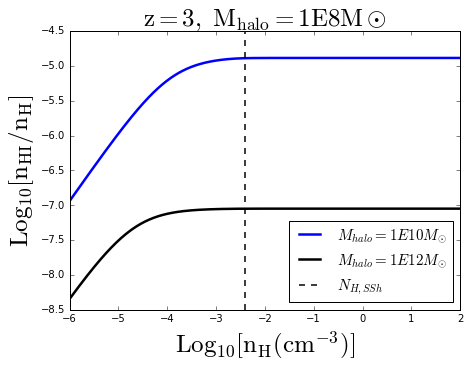

In [24]:
figsize(7,5)
plot(log10(nh), log10(E2), c='b', lw=2.5, label= r"$M_{halo} = 1E10M_{\odot}$")
plot(log10(nh), log10(E), c='k', lw=2.5, label= r"$M_{halo} = 1E12M_{\odot}$")
axvline(log10(0.004), ls='--', c='k', lw=1.5, label = "$N_{H,SSh}$")
legend(loc = 'best', fontsize=15)
#ylim(-6, 0.5)
title("$\mathrm{z=3,\ M_{halo} = 1E8M\odot}$", fontsize=25)
xlabel("$\mathrm{Log_{10}[n_H (cm^{-3})]}$", fontsize=25)
ylabel("$\mathrm{Log_{10}[n_{HI} / n_{H} ]}$", fontsize=25)
savefig("etavsnh.png", bbox_inches='tight')
#print E2

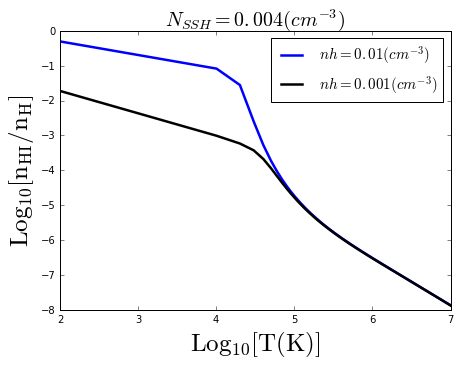

In [9]:
figsize(7,5)
plot(log10(T), log10(E3), c='b', lw=2.5, label= r"$nh = 0.01 (cm^{-3})$")
plot(log10(T), log10(E4), c='k', lw=2.5, label= r"$nh = 0.001 (cm^{-3})$")
legend(loc = 'upper right', fontsize=15)
title("$N_{SSH} = 0.004 (cm^{-3})$", fontsize=20)
xlabel("$\mathrm{Log_{10}[T(K)]}$", fontsize=25)
ylabel("$\mathrm{Log_{10}[n_{HI} / n_{H} ]}$", fontsize=25)
savefig("etavsT.png", bbox_inches='tight')

In [43]:
## Reproducing plot Fig.3 of Rahmati et al 2011
nh_r = logspace(-6, 2, 100)
NSSH_r = 6.0E-3
GUVB = 8.74E-13
T_r = 1E4
a, b, c = ABC(T_r, GUVB, nh_r, NSSH_r)
#print a, b, c
eta_r = Eta(a, b, c)

In [44]:
data_r = loadtxt('../data/rahmati.csv', delimiter=',')

(-6, 2)

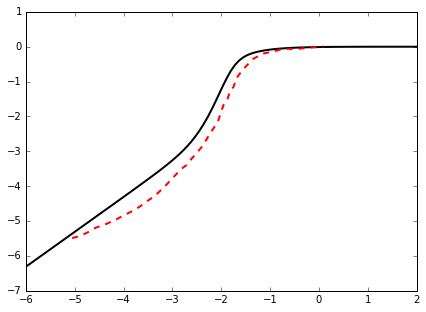

In [45]:
figure(figsize=(7, 5))
plot(log10(nh_r), log10(eta_r), lw=2, c='k')
plot(data_r[:,0], data_r[:,1], ls='--', c='r', lw=2)
xlim(-6, 2)

In [8]:
def NHtonh(NH, T):
    omega_m = 0.32
    omega_b = 0.0455
    fg = omega_b / omega_m
    nh = (NH**2.0 / ((1.6E21)**2 * (T/1E4) * (fg/0.17)))
    return nh

In [34]:
T1 = tvir(7.69E10, 6)
print T1
NHtonh(1E20, T1)

1042897.114


4.47822667032015e-05

In [ ]:
def 